In [24]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

### Classic Machine Learning Techniques

In [25]:
seed = 42
np.random.seed(seed)

df = pd.read_csv('dataset.csv')
display(df.head())
print(f'Number of samples: {df.shape[0]}')

,rating_mean,007,007 (series),18th century,1920s,1930s,1950s,1960s,1970s,1980s,...,Film-Noir,Horror,IMAX,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,3.893708,0.02875,0.02375,0.06250,0.07575,0.14075,0.14675,0.06350,0.20375,0.2020,...,0,0,0,0,0,0,0,0,0,0
1,3.251527,0.04125,0.04050,0.06275,0.08275,0.09100,0.06125,0.06925,0.09600,0.0765,...,0,0,0,0,0,0,0,0,0,0
2,3.142028,0.04675,0.05550,0.02925,0.08700,0.04750,0.04775,0.04600,0.14275,0.0285,...,0,0,0,0,0,1,0,0,0,0
3,2.853547,0.03425,0.03800,0.04050,0.03100,0.06500,0.03575,0.02900,0.08650,0.0320,...,0,0,0,0,0,1,0,0,0,0
4,3.058434,0.04300,0.05325,0.03800,0.04100,0.05400,0.06725,0.02775,0.07650,0.0215,...,0,0,0,0,0,0,0,0,0,0


Number of samples: 13798


### Linear Regression

In [26]:
X = df.drop('rating_mean', axis=1)
y = df['rating_mean']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=seed)

print('Number of training samples:', X_train.shape)
print('Number of testing samples:', X_test.shape)

Number of training samples: (11038, 1147)
Number of testing samples: (2760, 1147)


Beta_0: [ 0.0120097  -0.06973752 -0.00854665 ...  0.00379097  0.00540895
  0.03068477]
Beta_1: 3.56280013657151
Mean Square Error: 0.005227212704748563
R2 Score: 0.976825573190874


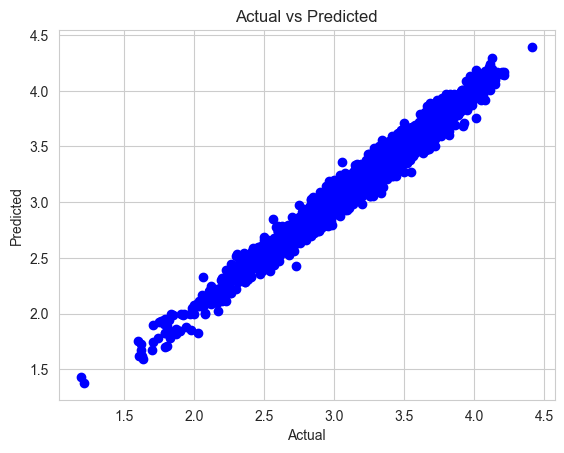

In [32]:
regressor = LinearRegression()
regressor.fit(X_train, y_train)

y_pred = regressor.predict(X_test)
print('Beta_0:', regressor.coef_)
print('Beta_1:', regressor.intercept_)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print('Mean Square Error:', mse)
print('R2 Score:', r2)

plt.scatter(y_test, y_pred, color='blue')
plt.xlabel('Actual')
plt.ylabel('Predicted')
#plt.plot(X_test, y_pred, color='red')
plt.title('Actual vs Predicted')
plt.show()

### Random Forest Regressor

Mean Square Error: 0.011898231568010354
R2 Score: 0.9472501479841442
Accuracy: 0.9472501479841442
suprisingly clever    4.417264e-01
bad plot              1.765404e-01
overrated             1.567651e-01
boring                4.090654e-02
imdb top 250          2.382115e-02
                          ...     
War                   6.787940e-07
Fantasy               4.530250e-07
Musical               3.773224e-07
Western               2.871193e-07
Animation             2.712037e-07
Length: 1147, dtype: float64


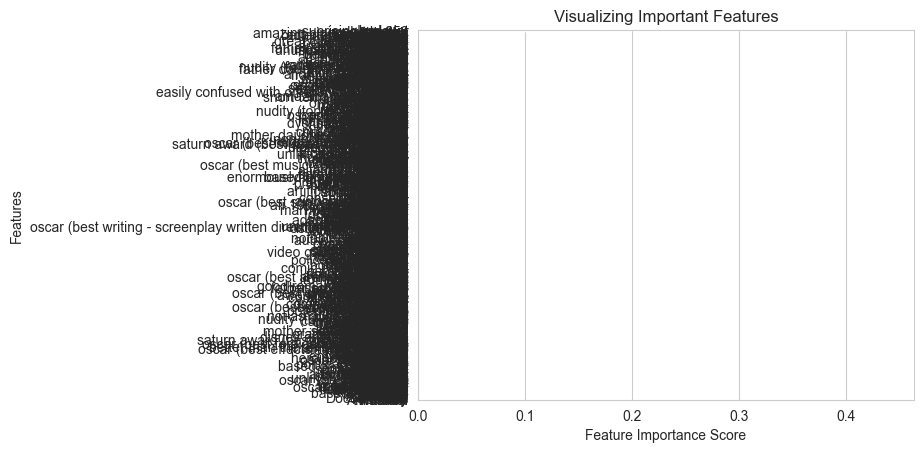

In [28]:
from sklearn.ensemble import RandomForestRegressor

rf_regressor = RandomForestRegressor(n_estimators=100, random_state=seed)
rf_regressor.fit(X_train, np.ravel(y_train))

y_pred = rf_regressor.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print('Mean Square Error:', mse)
print('R2 Score:', r2)

print('Accuracy:', rf_regressor.score(X_test, y_test))
rankVar = pd.Series(rf_regressor.feature_importances_, index=X.columns).sort_values(ascending=False)
print(rankVar)



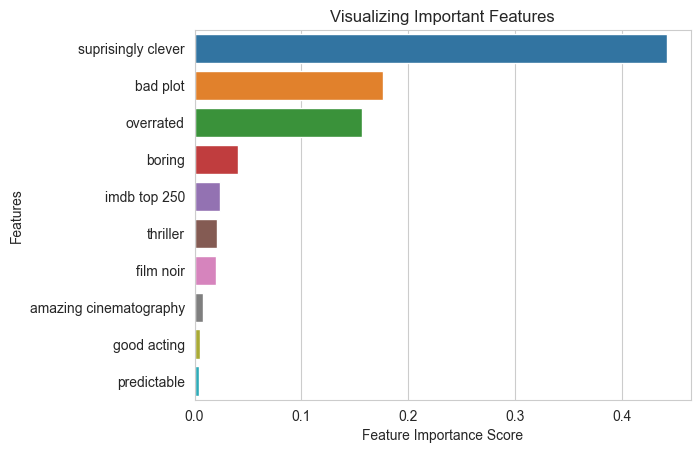

In [29]:
sns.barplot(x=rankVar[:10], y=rankVar.index[:10])
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Top 10 Features")
plt.show()

### Gradient Boosting Regressor

Mean Square Error: 0.008279249275029679
R2 Score: 0.9632946147027102
Accuracy: 0.9632946147027102


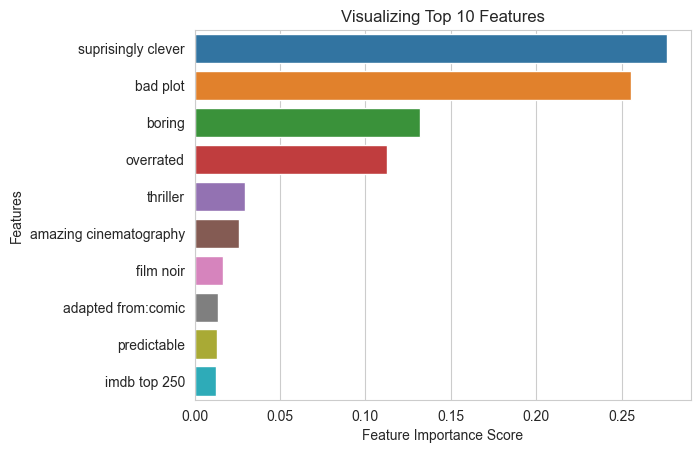

In [33]:
from sklearn.ensemble import GradientBoostingRegressor

gb_regressor = GradientBoostingRegressor(n_estimators=100, random_state=seed)
gb_regressor.fit(X_train, np.ravel(y_train))

y_pred = gb_regressor.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print('Mean Square Error:', mse)
print('R2 Score:', r2)

print('Accuracy:', gb_regressor.score(X_test, y_test))

rankVar = pd.Series(gb_regressor.feature_importances_, index=X.columns).sort_values(ascending=False)

sns.barplot(x=rankVar[:10], y=rankVar.index[:10])
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Top 10 Features")
plt.show()

### Support Vector Machine Regressor

In [ ]:
from sklearn.svm import SVR

svr_regressor = SVR(kernel='linear', C=1000)
svr_regressor.fit(X_train, np.ravel(y_train))

y_pred = svr_regressor.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print('Mean Square Error:', mse)
print('R2 Score:', r2)

print('Accuracy:', svr_regressor.score(X_test, y_test))


